# **Outlier detection and removal using z-score and standard deviation in python pandas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Supervised Learning/Some Important Topic for Machine Learning/Features Engineering /Outliers find/height.csv")
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [3]:
df.sample(5)

,gender,height
6070,Female,62.302497
1312,Male,66.097576
1228,Male,72.881092
2139,Male,68.963534
793,Male,71.206619


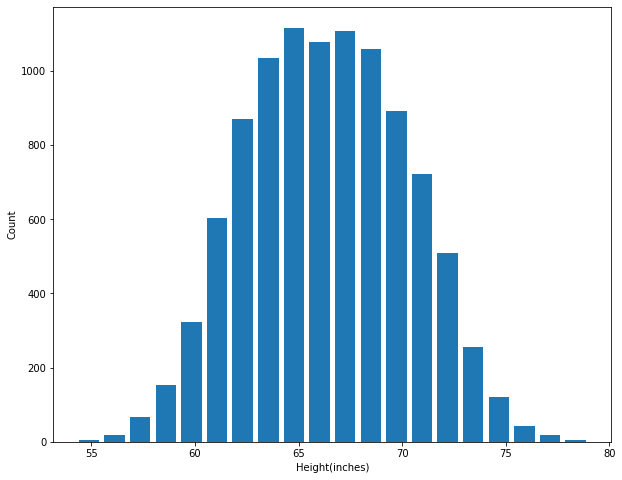

In [4]:
plt.figure(figsize=(10,8))
plt.hist(x=df.height,bins=20,rwidth=0.8)
plt.xlabel("Height(inches)")
plt.ylabel("Count")
plt.show()

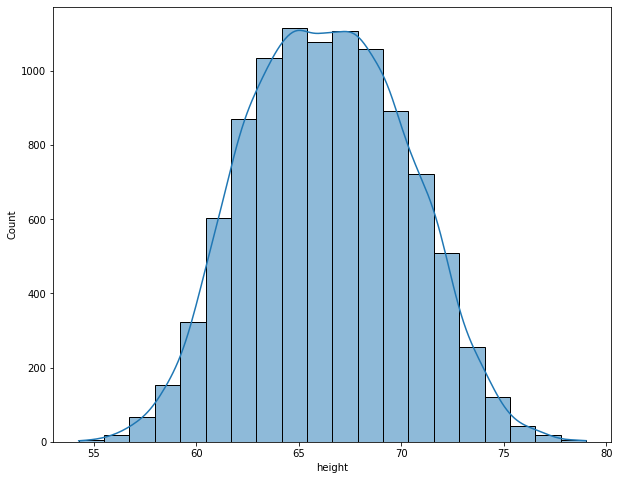

In [5]:
plt.figure(figsize=(10,8))
sns.histplot(x=df.height,bins=20,kde=True)
plt.show()

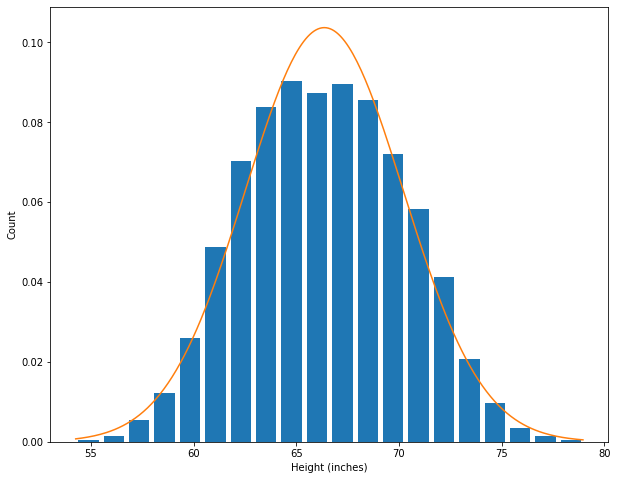

In [6]:
from scipy.stats import norm
plt.figure(figsize=(10,8))
plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))
plt.show()

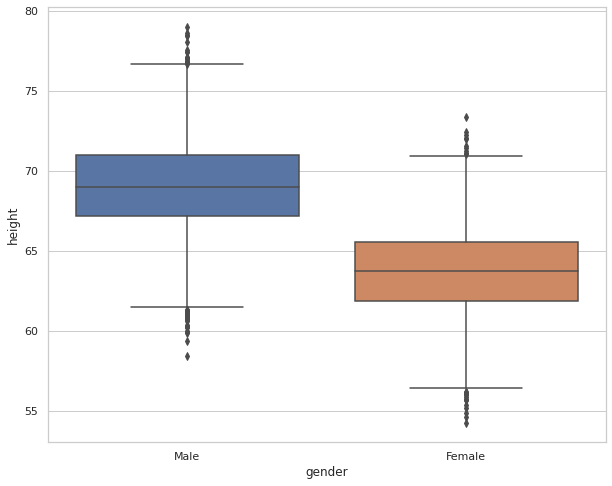

In [7]:
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
sns.boxplot(x='gender',y='height',data=df)
plt.show()

In [8]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [9]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

In [10]:
df.height.mean()

66.3675597548656

In [11]:
df.height.std()

3.847528120795573

# Here the mean is 66.37 and standard deviation is 3.84.

### (1) Outlier detection and removal using 3 standard deviation
One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bounds

In [12]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

77.91014411725232

In [13]:
lower_limit = df.height.mean() - 3*df.height.std()
lower_limit

54.824975392478876

## Here are the outliers that are beyond 3 std deviation from mean

In [14]:
df[(df.height>upper_limit) | (df.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


### Above the heights on higher end is 78 inch which is around 6 ft 6 inch. Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you remove those data points. Similarly on lower end it is 54 inch which is around 4 ft 6 inch. While this is also a legitimate height you don't find many people having this height so it is safe to consider both of these cases as outliers

## Now remove these outliers and generate new dataframe

In [15]:
df_no_outlier_std = df[(df.height>lower_limit) & (df.height<upper_limit)]
df_no_outlier_std.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [16]:
df_no_outlier_std.shape

(9993, 2)

In [17]:
# 7 outliers gone
df.shape[0] - df_no_outlier_std.shape[0]

7

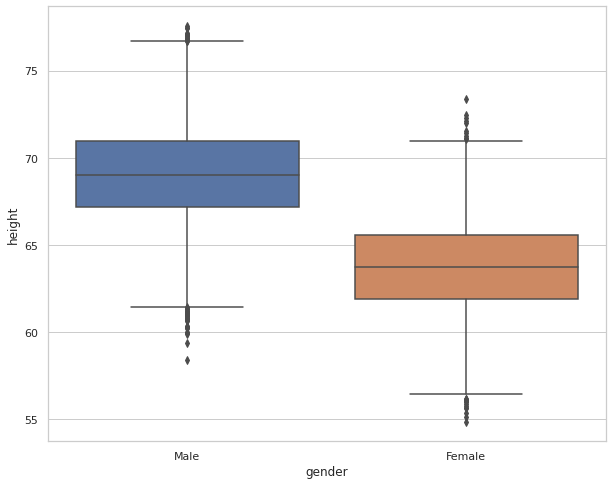

In [18]:
# After remove outliers using standard deviation
plt.figure(figsize=(10,8))
sns.boxplot(x='gender',y='height',data=df_no_outlier_std)
plt.show()

<h3 style='color:blue'>(2) Outlier detection and removal using Z Score</h3>

### **Z score is a way to achieve same thing that we did above in part (1)**

**Z score indicates how many standard deviation away a data point is.**

For example in our case mean is 66.37 and standard deviation is 3.84. 

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

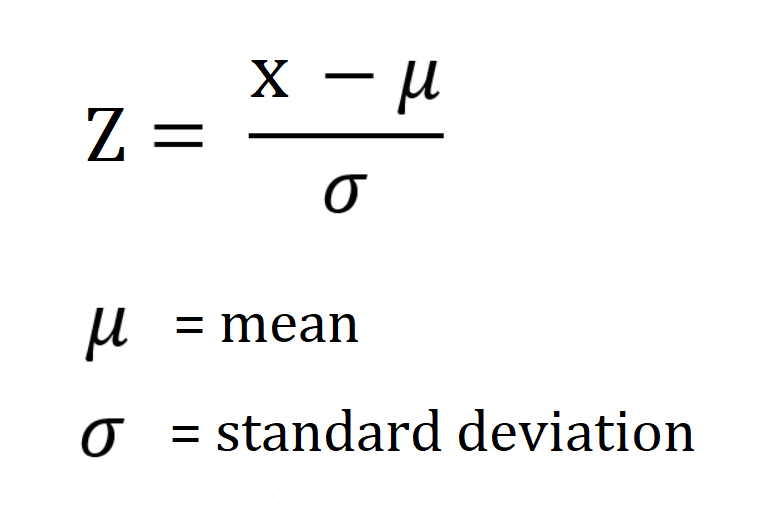

In [19]:
# create z-score value for each row
df['z-score'] = (df.height-df.height.mean())/df.height.std()
df.head()

,gender,height,z-score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


### **Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean**

### **Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away**

In [20]:
df[df['z-score']>3]

,gender,height,z-score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [21]:
df[df['z-score']<-3]

,gender,height,z-score
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [22]:
df[(df['z-score']<-3)|(df['z-score']>3)]

,gender,height,z-score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [23]:
df_no_outlier_Zscore = df[(df['z-score']>-3)&(df['z-score']<3)]
df_no_outlier_Zscore

,gender,height,z-score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


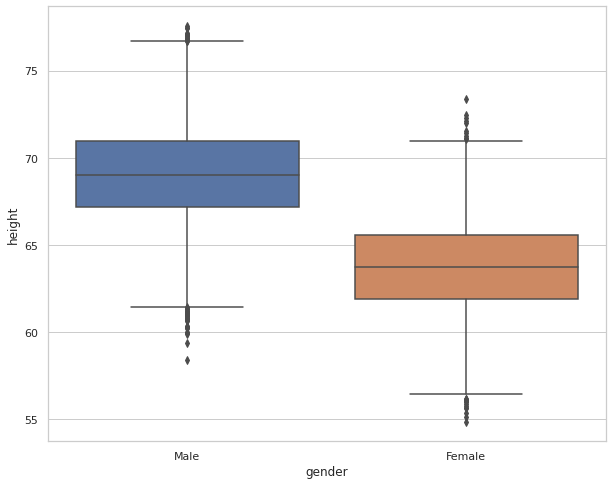

In [24]:
# After remove outliers using standard Z-score
plt.figure(figsize=(10,8))
sns.boxplot(x='gender',y='height',data=df_no_outlier_Zscore)
plt.show()

# **Excercise**

In [25]:
ex_df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Supervised Learning/Some Important Topic for Machine Learning/Features Engineering /Outliers find/bhp.csv")
ex_df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [26]:
ex_df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [27]:
ex_df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

### **Above, you can see max is 12000000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score**

## Also plot **histogram** to see how is the data distribution

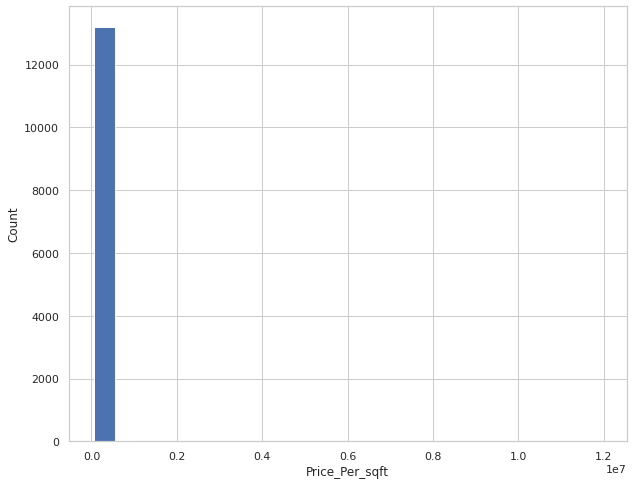

In [28]:
plt.figure(figsize=(10,8))
plt.hist(ex_df.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel("Price_Per_sqft")
plt.ylabel("Count")
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

Using log scale can make visualization little better

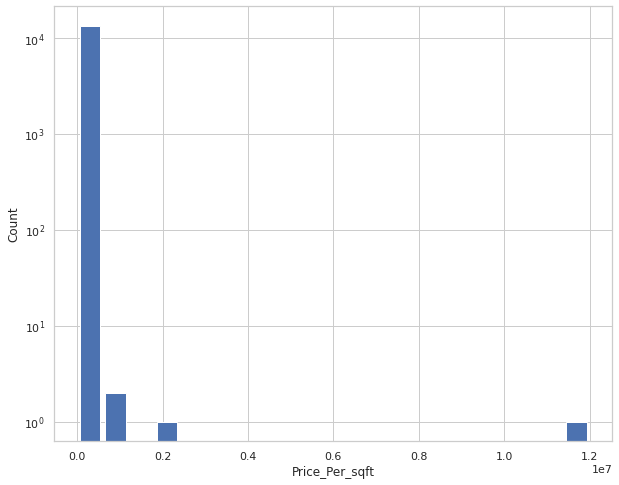

In [29]:
plt.figure(figsize=(10,8))
plt.hist(ex_df.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel("Price_Per_sqft")
plt.ylabel("Count")
plt.yscale('log')
plt.show()

**You see atleast few bars on right hand side of our highest building at least :)**

## **(1) Treat outliers using percentile first**

In [30]:
lower_limit2,upper_limit2 = ex_df.price_per_sqft.quantile([0.01,0.999])
lower_limit2,upper_limit2

(2549.0, 50959.36200000099)

In [31]:
outliers = ex_df[(ex_df.price_per_sqft<lower_limit2) | (ex_df.price_per_sqft>upper_limit2)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.00,3,672727
9726,Chandapura,2 BHK,750.0,1.0,18.50,2,2466
7909,Jakkur,2 BHK,850.0,1.0,19.90,2,2341
1503,Chandapura,2 BHK,1201.0,2.0,27.00,2,2248
8827,Electronic City,2 BHK,1200.0,2.0,20.00,2,1666
8501,Chandapura,1 BHK,450.0,1.0,9.00,1,2000
12355,other,4 BHK,16335.0,4.0,149.00,4,912
559,Bommasandra,2 BHK,1126.0,2.0,28.15,2,2500
665,Yelahanka,3 BHK,35000.0,3.0,130.00,3,371
7001,other,2 BHK,1600.0,2.0,31.00,2,1937


**Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property :) Also we have properties that has price per sqft value such as 12000000 which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point**

In [32]:
ex_df2 = ex_df[(ex_df.price_per_sqft>lower_limit2) & (ex_df.price_per_sqft<upper_limit2)]
ex_df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [33]:
ex_df2.shape

(13050, 7)

In [34]:
ex_df.shape

(13200, 7)

In [35]:
# we remove total 28 outliers
ex_df.shape[0] - ex_df2.shape[0]

150

# **Now remove outliers using 4 standard deviation**

In [36]:
ex_df.price_per_sqft.mean()

7920.336742424242

In [37]:
ex_df.price_per_sqft.std()

106727.16032810845

In [38]:
max_limit = ex_df2.price_per_sqft.mean() + 4*ex_df2.price_per_sqft.std()
min_limit = ex_df2.price_per_sqft.mean() - 4*ex_df2.price_per_sqft.std()
min_limit,max_limit

(-9849.944576654545, 23258.824729911248)

In [39]:
ex_df2[(ex_df2.price_per_sqft<min_limit) | (ex_df2.price_per_sqft>max_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
2371,other,5 Bedroom,3000.0,6.0,1000.0,5,33333
12631,Rajaji Nagar,5 Bedroom,2500.0,4.0,650.0,5,26000
9791,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083
6709,Malleshwaram,4 Bedroom,4000.0,4.0,1100.0,4,27500
6109,HRBR Layout,6 Bedroom,1000.0,6.0,275.0,6,27500
2825,HBR Layout,9 Bedroom,1200.0,6.0,280.0,9,23333
7643,other,4 BHK,5422.0,6.0,1900.0,4,35042
1078,other,4 Bedroom,2400.0,5.0,775.0,4,32291
8595,other,3 Bedroom,1200.0,2.0,300.0,3,25000


In [40]:
ex_df3 = ex_df2[(ex_df2.price_per_sqft>min_limit) & (ex_df2.price_per_sqft<max_limit)]
ex_df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [41]:
ex_df3.shape

(12925, 7)

In [42]:
# we remove 125 outliers
ex_df2.shape[0] - ex_df3.shape[0]

125

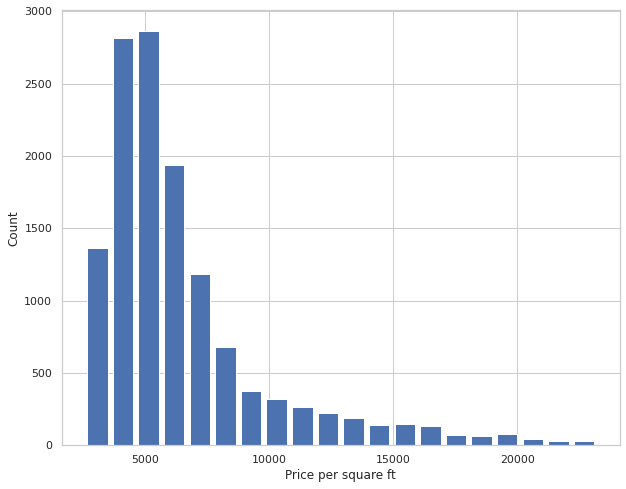

In [43]:
plt.figure(figsize=(10,8))
plt.hist(ex_df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

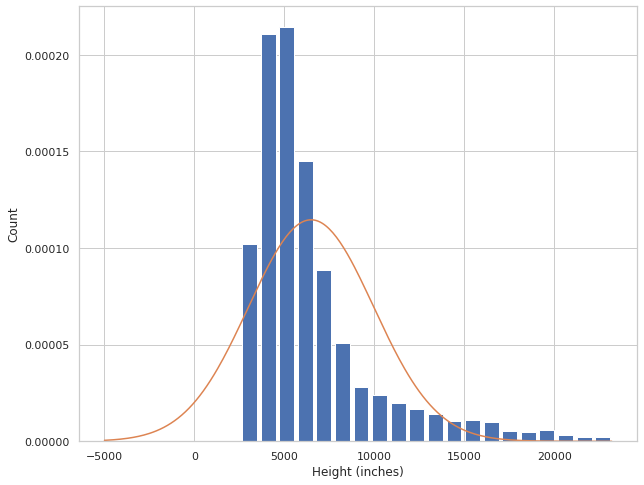

In [44]:
from scipy.stats import norm
import numpy as np
plt.figure(figsize=(10,8))
plt.hist(ex_df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
rng = np.arange(-5000, ex_df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,ex_df3.price_per_sqft.mean(),ex_df3.price_per_sqft.std()))
plt.show()

# (3) Now remove outliers using z score. Use z score of 4 as your **thresold**

In [45]:
import warnings
warnings.filterwarnings(action="ignore")

In [46]:
ex_df2['z_score'] = (ex_df2.price_per_sqft-ex_df2.price_per_sqft.mean())/ex_df2.price_per_sqft.std()
ex_df2.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
222,other,3 BHK,2405.0,4.0,260.00,3,10810,0.992018
4350,other,5 Bedroom,1750.0,5.0,450.00,5,25714,4.593239
2941,Ardendale,2 BHK,1100.0,2.0,48.00,2,4363,-0.565757
2385,TC Palaya,2 Bedroom,1000.0,2.0,64.00,2,6400,-0.073561
4650,Begur Road,2 BHK,1225.0,2.0,35.52,2,2899,-0.919500
8422,Vittasandra,2 BHK,1404.0,2.0,75.00,2,5341,-0.329445
11038,Rajiv Nagar,2 BHK,972.0,2.0,43.00,2,4423,-0.551259
8290,Balagere,2 BHK,1012.0,2.0,53.58,2,5294,-0.340802
5012,other,4 Bedroom,750.0,4.0,85.00,4,11333,1.118389
2323,Sarjapur Road,4 BHK,4395.0,4.0,242.00,4,5506,-0.289576


In [47]:
outliers_z = ex_df2[(ex_df2.z_score < -4) | (ex_df2.z_score>4)]
outliers_z.shape

(125, 8)

In [48]:
outliers_z.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
7908,HAL 2nd Stage,7 Bedroom,1000.00,7.0,250.0,7,25000,4.420716
3816,Domlur,6 BHK,2400.00,4.0,600.0,6,25000,4.420716
4357,other,4 Bedroom,3250.00,5.0,850.0,4,26153,4.699313
9636,other,4 Bedroom,2100.00,3.0,1000.0,4,47619,9.886096
6864,5th Block Hbr Layout,9 Bedroom,2600.00,12.0,675.0,9,25961,4.652921
5639,other,3 BHK,2777.29,5.0,650.0,3,23404,4.035078
10465,Electronic City,4 Bedroom,1800.00,3.0,700.0,4,38888,7.776444
11696,other,4 Bedroom,2360.00,4.0,601.0,4,25466,4.533315
13013,other,4 Bedroom,1200.00,5.0,350.0,4,29166,5.427338
3340,other,19 BHK,2000.00,16.0,490.0,19,24500,4.299902


In [49]:
after_remove_outliers = ex_df2[(ex_df2.z_score>-4)&(ex_df2.z_score<4)]
after_remove_outliers.shape

(12925, 8)

In [50]:
ex_df2.shape[0] - after_remove_outliers.shape[0]

125